In [1]:
import pandas as pd
datafile = 'SPY.csv'
data = pd.read_csv(datafile, index_col = 'Date')
data.index = pd.to_datetime(data.index) # Converting the dates from string to datetime format
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-20,198.119995,199.160004,198.080002,198.919998,180.141846,72763000
2014-08-21,199.089996,199.759995,198.929993,199.500000,180.667160,67791000
2014-08-22,199.339996,199.690002,198.740005,199.190002,180.386368,76107000
2014-08-25,200.139999,200.589996,199.149994,200.199997,181.301010,63855000
2014-08-26,200.330002,200.820007,200.279999,200.330002,181.418716,47298000
...,...,...,...,...,...,...
2019-08-13,287.739990,294.149994,287.359985,292.549988,292.549988,94299800
2019-08-14,288.070007,288.739990,283.760010,283.899994,283.899994,135622100
2019-08-15,284.880005,285.640015,282.390015,284.649994,284.649994,99556600


In [2]:
#!pip install mplfinance

In [3]:
import mplfinance as mpf

C:\Users\91879\anaconda3\lib\site-packages\mplfinance\plotting.py:70: DeprecationWarning: 


     Default value is now `no_xgaps=True`
     However, to set `no_xgaps=False` and silence this warning,
     use instead: `show_nontrading=True`.

  category=DeprecationWarning)


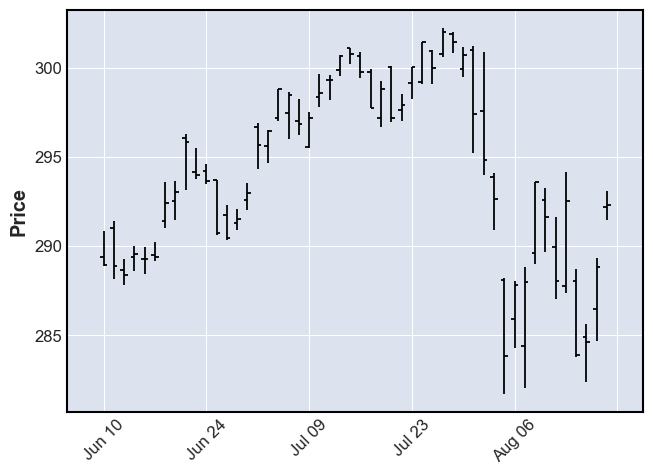

In [4]:
mpf.plot(data[-50:], no_xgaps = True)

C:\Users\91879\anaconda3\lib\site-packages\mplfinance\plotting.py:70: DeprecationWarning: 


     Default value is now `no_xgaps=True`
     However, to set `no_xgaps=False` and silence this warning,
     use instead: `show_nontrading=True`.

  category=DeprecationWarning)


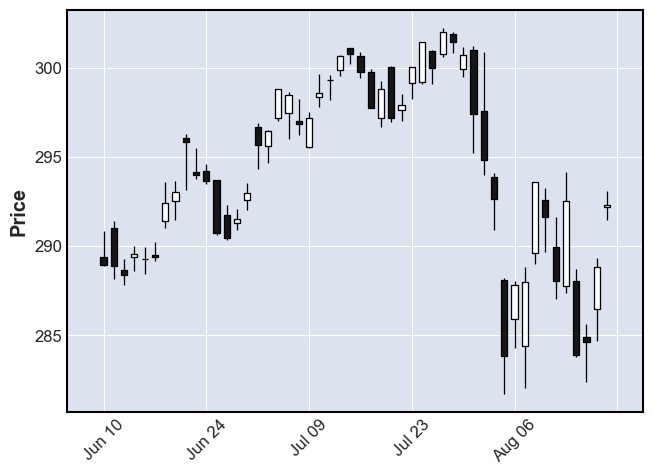

In [5]:
mpf.plot(data[-50:], type='candlestick', no_xgaps = True)

In [6]:
#!pip install mpl-finance


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Loading data into dataframe:
datafile = 'SPY.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mpl.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]

C:\Users\91879\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


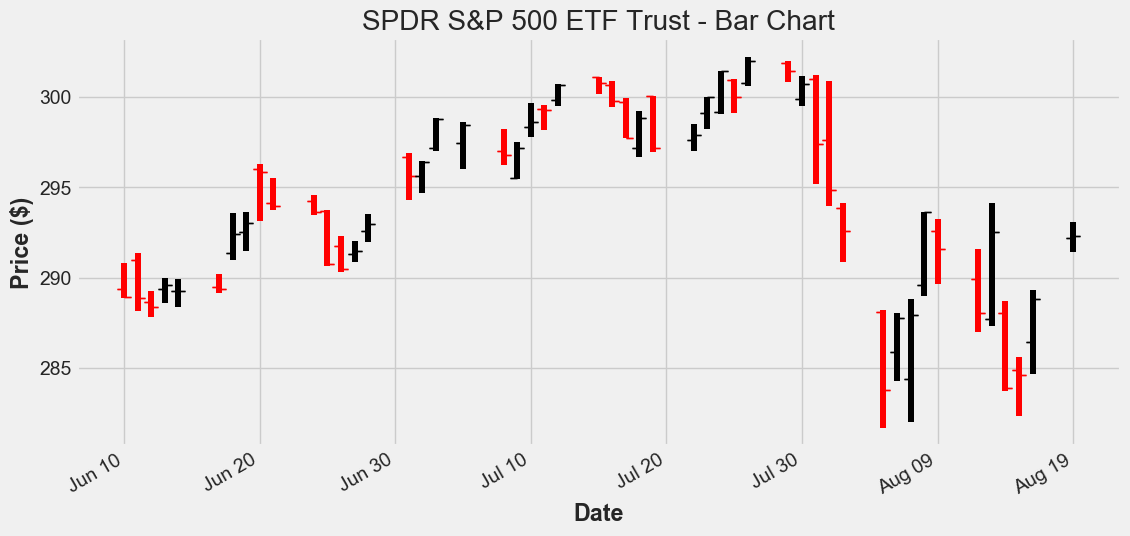

In [8]:
import mpl_finance as mpf # This is the old mpl-finance library - note the '_' in the library name

# We can now feed the ohlc matrix into mpl-finance to create a candle stick chart:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('SPDR S&P 500 ETF Trust - Bar Chart')

# Choosing to display the dates as "Month Day":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# This is to automatically arrange the date labels in a readable way:
fig.autofmt_xdate()

# plt.show() # add this if you're not using Jupyter Notebook

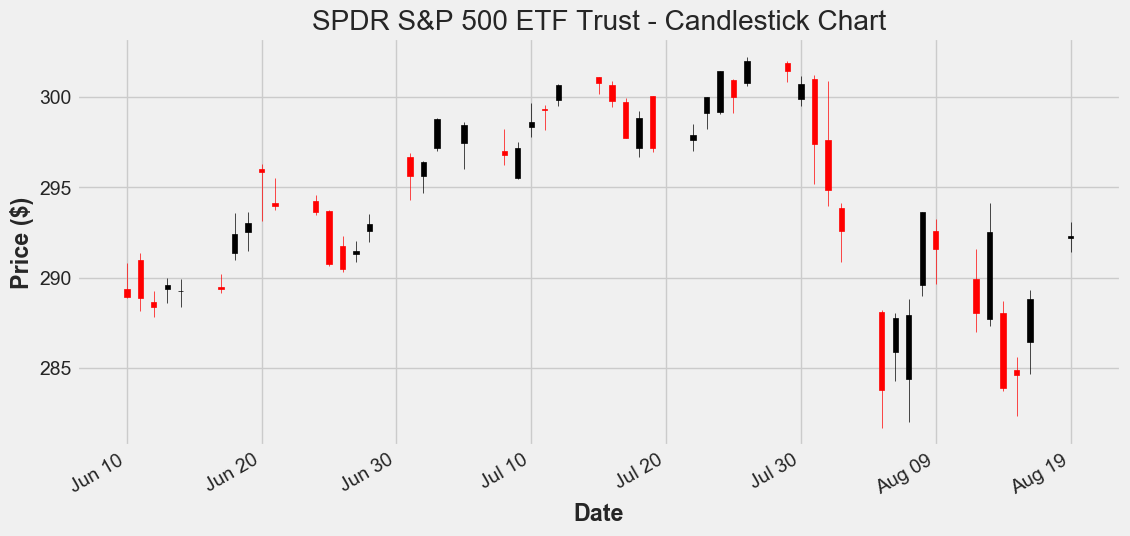

In [9]:
fig, ax = plt.subplots(figsize = (12,6))

mpf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('SPDR S&P 500 ETF Trust - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate()

# plt.show() # add this if you're not using Jupyter Notebook

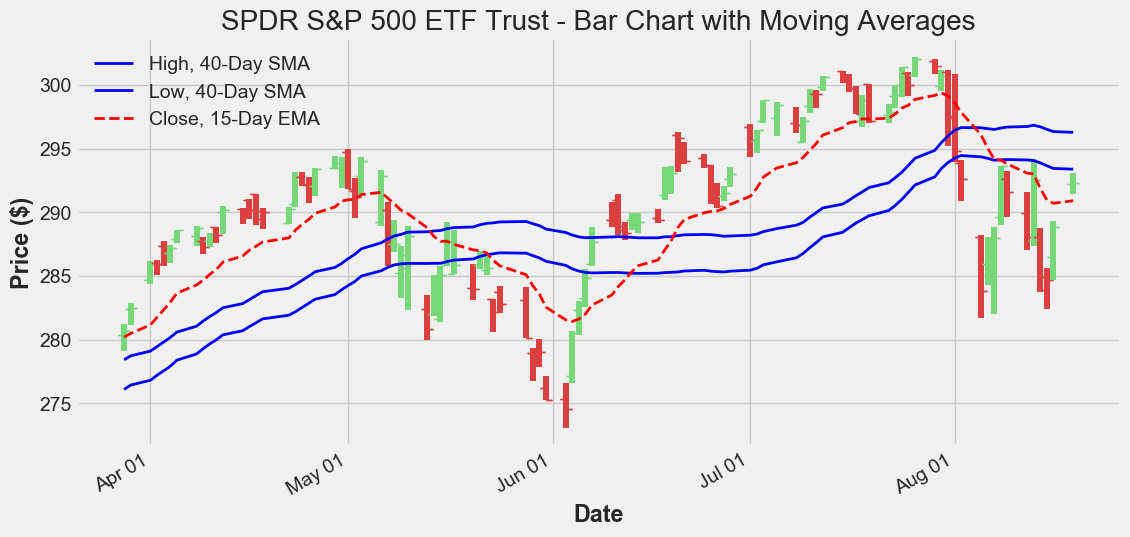

In [10]:
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(span=15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('SPDR S&P 500 ETF Trust - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

# plt.show() # add this if you're not using Jupyter Notebook